
# EPL 2020/21 Football Analysis

This project analyzes the 2020/21 English Premier League season data. Below are the included analyses:

1. **Top Performers**
   - Top goal scorers and assist providers.
   - Players with the most yellow and red cards.

2. **Positional Analysis**
   - Goals scored by players in each position.

3. **Team-wise and Nationality-based Stats**
   - Goals, assists, and cards broken down by team and nationality.

4. **Passing Accuracy**
   - Players with the highest pass completion rates.

5. **Age Analysis**
   - Distribution of players by age.
   - Age-wise goal-scoring analysis.

6. **Performance Metrics**
   - Comparison of expected goals (xG) vs. actual goals scored.
   - Players with the most minutes played.

---


# EPL Football Analysis Project

This project demonstrates an end-to-end analysis of football player performance in the English Premier League (EPL) using machine learning techniques and data exploration. The dataset contains key player metrics such as goals, assists, positions, and more. Below is an overview of the analysis workflow:

---

## 1. Data Loading and Exploration
- The `epl_players.csv` dataset is loaded into a Pandas DataFrame. It contains various player statistics, including:
  - `Name`: Player’s name.
  - `Club`: The club the player is associated with.
  - `Position`: The player’s position on the field.
  - `Goals`, `Assists`, `Yellow_Cards`, `Red_Cards`, etc.
- A summary of the dataset is displayed to understand its structure, check for missing values, and confirm the data types.

---

## 2. Top Scorers, Assist Providers, and Disciplinary Stats
- The dataset is analyzed to identify the top scorers and top assist providers by sorting the players based on the number of goals and assists.
- The top 10 players with the most yellow and red cards are also identified to understand the disciplinary behaviors of players.

---

## 3. Goals by Positions
- The total number of goals scored by players in different positions is analyzed:
  - A bar chart is plotted to visualize the number of goals scored by players in various positions, helping to identify which positions contribute the most to team goals.

---

## 4. Team-wise or Nationality-based Breakdowns
- **Goals by Club**: The total goals scored by players from each club are analyzed and visualized.
- **Goals by Nationality**: Similarly, the dataset is analyzed to show the goals scored by players from different nationalities, providing insights into international representation in the EPL.

---

## 5. Pass Accuracy Analysis
- The pass accuracy of players is examined by plotting pass attempts against the percentage of passes completed. This analysis helps assess how effective players are in terms of passing.

---

## 6. Players by Age
- The distribution of players’ ages in the league is visualized. The analysis helps identify trends in age distribution and provides insights into the average age of players.

---

## 7. Goal Scorers by Age
- The analysis explores the number of goals scored by players of different age groups. It helps identify trends and patterns in goal-scoring abilities based on age.

---

## 8. Expected Goals (xG) vs. Actual Goals
- A comparison is made between expected goals (xG) and actual goals scored by players. This helps assess whether players over-perform or under-perform relative to their expected contributions.

---

## 9. Most Minutes Played
- The top 10 players who have played the most minutes during the season are identified. This analysis helps understand player endurance and their importance in terms of minutes played.

---

## 10. Yellow Cards and Red Cards
- The total number of yellow and red cards accumulated by players is computed to understand disciplinary actions within the league.

---

## Key Takeaways
- The project provides insights into player performance across various metrics such as goals, assists, disciplinary actions, pass accuracy, and more.
- The workflow involves **data exploration, feature extraction, and analysis**, offering a detailed understanding of player statistics in the EPL.


# Import Libraries and Load Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'file_path' with your actual file path)
df = pd.read_csv('EPL_20_21.csv')

# Check the first few rows
df.head()


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


# Top Scorers, Assist Providers, or Disciplinary Stats

In [3]:
# Top 10 goal scorers
top_scorers = df[['Name', 'Goals']].sort_values(by='Goals', ascending=False).head(10)

# Top 10 assist providers
top_assists = df[['Name', 'Assists']].sort_values(by='Assists', ascending=False).head(10)

# Top 10 players with most yellow cards
top_yellow_cards = df[['Name', 'Yellow_Cards']].sort_values(by='Yellow_Cards', ascending=False).head(10)

# Top 10 players with most red cards
top_red_cards = df[['Name', 'Red_Cards']].sort_values(by='Red_Cards', ascending=False).head(10)

# Display results
print("Top Scorers:", top_scorers)
print("Top Assists:", top_assists)
print("Top Yellow Cards:", top_yellow_cards)
print("Top Red Cards:", top_red_cards)


Top Scorers:                       Name  Goals
162             Harry Kane     23
81           Mohamed Salah     22
51         Bruno Fernandes     18
214        Patrick Bamford     17
161          Son Heung-min     17
237  Dominic Calvert-Lewin     16
110            Jamie Vardy     15
267          Ollie Watkins     14
33          İlkay Gündoğan     13
191    Alexandre Lacazette     13
Top Assists:                      Name  Assists
162            Harry Kane       14
34        Kevin De Bruyne       12
51        Bruno Fernandes       12
273         Jack Grealish       10
161         Son Heung-min       10
110           Jamie Vardy        9
220  Raphael Dias Belloli        9
54        Marcus Rashford        9
136       Aaron Cresswell        8
401           Pascal Groß        8
Top Yellow Cards:                  Name  Yellow_Cards
266       John McGinn            12
53      Harry Maguire            11
480   Conor Gallagher            11
218   Kalvin Phillips            10
270      Douglas 

# Goals by Positions
To analyze goals scored by each position:

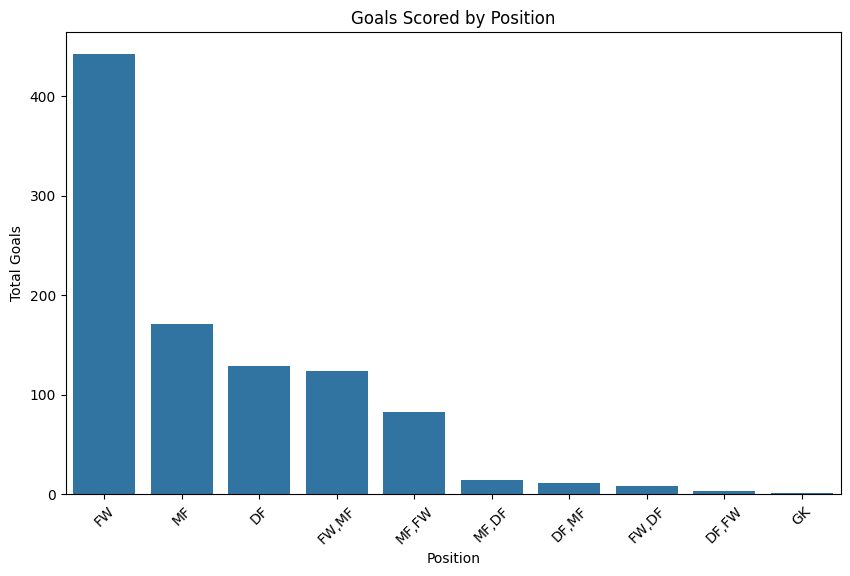

In [4]:
# Group by position and sum up the goals
goals_by_position = df.groupby('Position')['Goals'].sum().sort_values(ascending=False)

# Plot the goals by position
plt.figure(figsize=(10, 6))
sns.barplot(x=goals_by_position.index, y=goals_by_position.values)
plt.title('Goals Scored by Position')
plt.xlabel('Position')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.show()


# Team-wise or Nationality-based Breakdowns

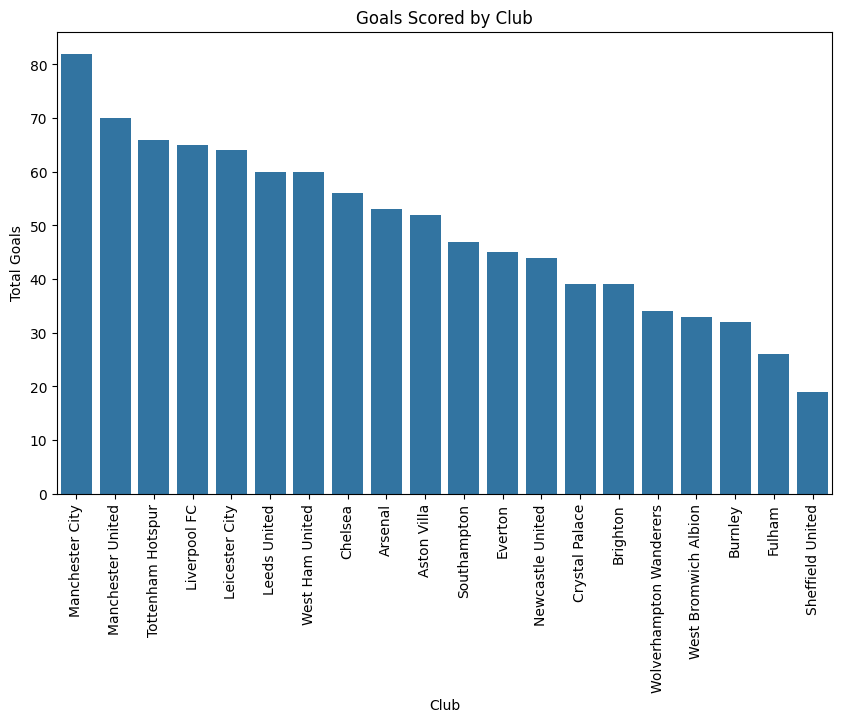

In [6]:
# Goals scored by club
goals_by_club = df.groupby('Club')['Goals'].sum().sort_values(ascending=False)

# Plot the goals by club
plt.figure(figsize=(10, 6))
sns.barplot(x=goals_by_club.index, y=goals_by_club.values)
plt.title('Goals Scored by Club')
plt.xlabel('Club')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()


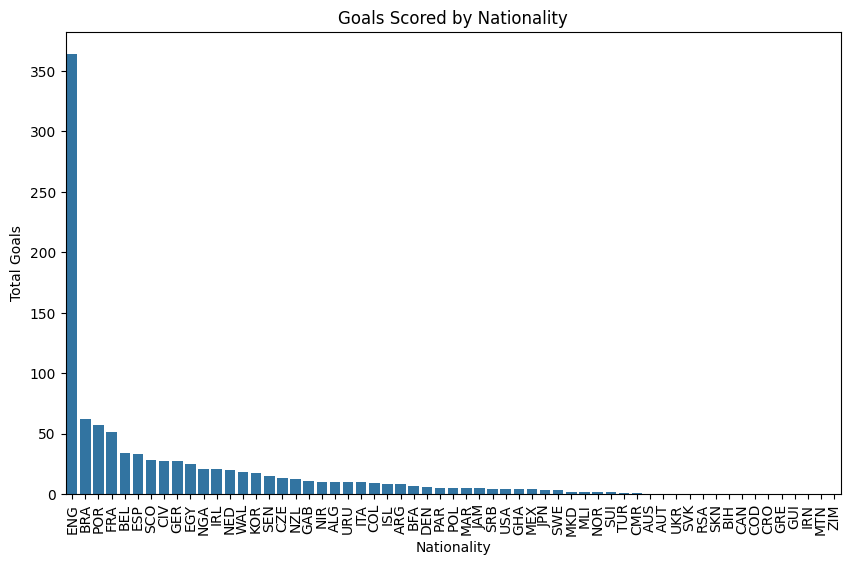

In [7]:

# Goals scored by nationality
goals_by_nationality = df.groupby('Nationality')['Goals'].sum().sort_values(ascending=False)

# Plot the goals by nationality
plt.figure(figsize=(10, 6))
sns.barplot(x=goals_by_nationality.index, y=goals_by_nationality.values)
plt.title('Goals Scored by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()

# Pass Accuracy Analysis

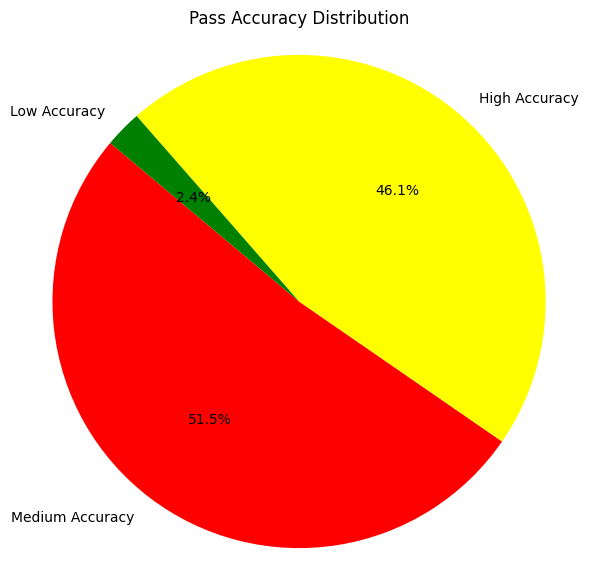

In [12]:
# Define pass accuracy categories
def categorize_accuracy(accuracy):
    if accuracy < 50:
        return 'Low Accuracy'
    elif 50 <= accuracy < 80:
        return 'Medium Accuracy'
    else:
        return 'High Accuracy'

# Apply the categorization function
df['Accuracy_Category'] = df['Perc_Passes_Completed'].apply(categorize_accuracy)

# Count the number of players in each category
accuracy_counts = df['Accuracy_Category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(accuracy_counts, labels=accuracy_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'yellow', 'green'])
plt.title('Pass Accuracy Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


# Players by Age Group

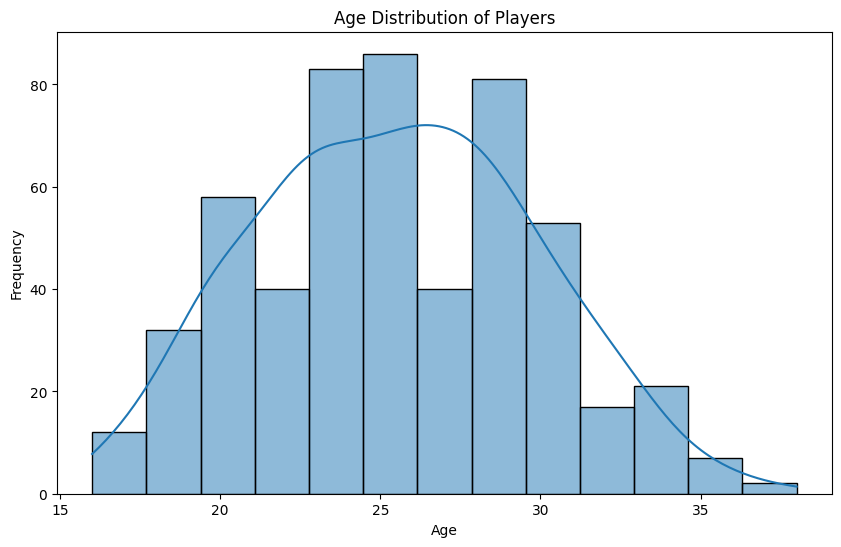

In [9]:
# Plot the age distribution of players
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Goal Scorers by Age

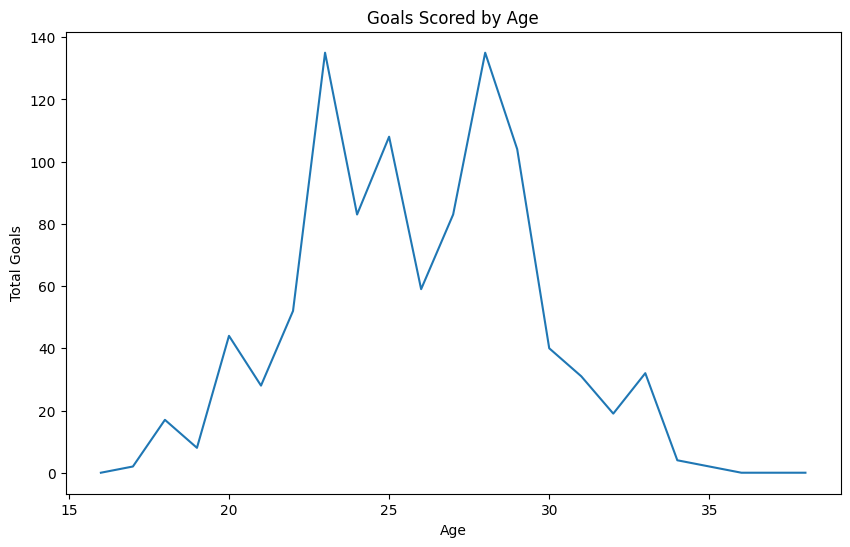

In [10]:
# Group by age and sum the goals
goals_by_age = df.groupby('Age')['Goals'].sum()

# Plot the goals by age
plt.figure(figsize=(10, 6))
sns.lineplot(x=goals_by_age.index, y=goals_by_age.values)
plt.title('Goals Scored by Age')
plt.xlabel('Age')
plt.ylabel('Total Goals')
plt.show()


# Expected Goals (xG) vs. Actual Goals

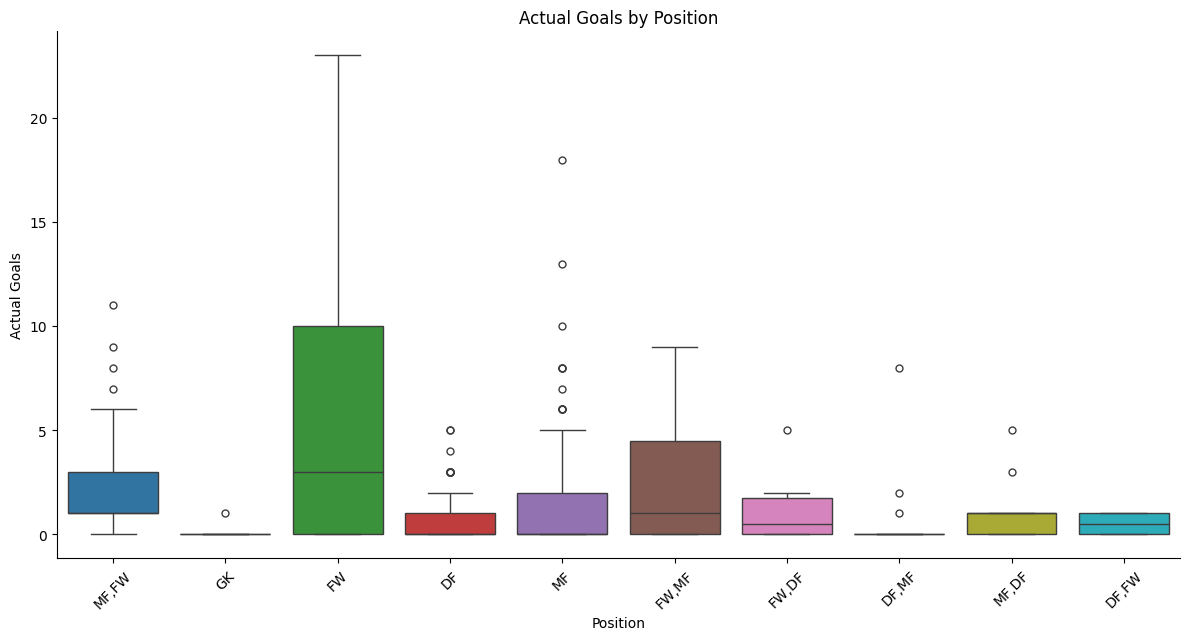

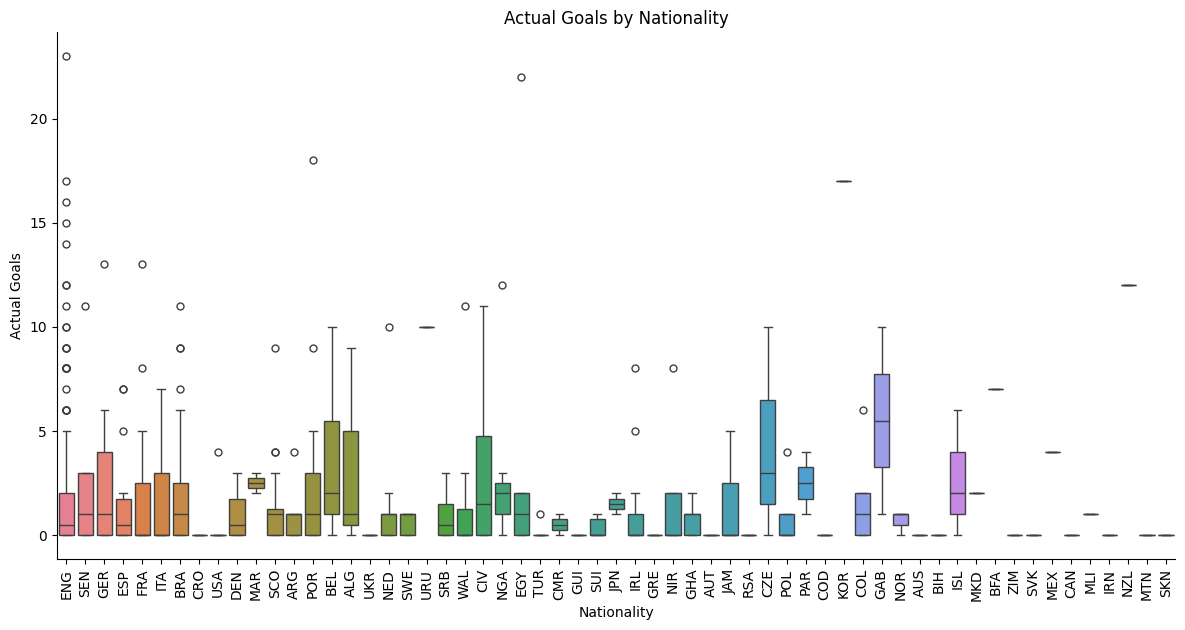

In [14]:
# Use Seaborn's catplot to compare xG vs Actual Goals
sns.catplot(x='Position', y='Goals', hue='Position', kind='box', data=df, height=6, aspect=2)
plt.title('Actual Goals by Position')
plt.xlabel('Position')
plt.ylabel('Actual Goals')
plt.xticks(rotation=45)
plt.show()

# Alternatively, if you want to compare xG vs Actual Goals for a categorical feature like nationality
sns.catplot(x='Nationality', y='Goals', hue='Nationality', kind='box', data=df, height=6, aspect=2)
plt.title('Actual Goals by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Actual Goals')
plt.xticks(rotation=90)
plt.show()


Most Minutes Played

In [24]:
# Top 10 players with most minutes played
top_minutes = df[['Name', 'Mins']].sort_values(by='Mins', ascending=False).head(10)

print("Top 10 Players by Minutes Played:", top_minutes)


Top 10 Players by Minutes Played:                   Name  Mins
264  Emiliano Martínez  3420
366  James Ward-Prowse  3420
505     Aaron Ramsdale  3420
108  Kasper Schmeichel  3420
159    Pierre Højbjerg  3420
160        Hugo Lloris  3420
135       Tomáš Souček  3419
422    Ashley Westwood  3410
212      Stuart Dallas  3409
265       Matt Targett  3404


# Yellow Cards and Red Cards


In [27]:
# Total yellow cards and red cards
total_yellow_cards = df['Yellow_Cards'].sum()
total_red_cards = df['Red_Cards'].sum()

print(f"Total Yellow Cards: {total_yellow_cards}")
print(f"Total Red Cards: {total_red_cards}")


Total Yellow Cards: 1125
Total Red Cards: 48
